# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic

## 데이터 다운로드

training data set and testing data set are given by Kaggle
you can download from  
my github [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

In [25]:
import os
# import warnings
# warnings.filterwarnings('ignore')
# 경고 무시 라이브러리 그러나 여기선 경고 문자를 봐야하기에 주석처리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# train 데이터, test 데이터 지정
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 데이터 확인

In [27]:
# 불러온 train.csv 파일 상위 5개 데이터 확인
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


### 데이터 분석
- Survived: # 생존여부 0 = 사망, 1 = 생존  
- pclass: 	# 티켓 등급	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# 혼자 탔는지 여럿이서 탔는지에 대한 여부  	
- parch:	# 아이와 부모가 함께 탑승한 여부  	
- ticket:	티켓번호	
- cabin:	선실 번호
- embarked:	탑승장  

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


train 데이터에 (null)값 확인

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 시각화를 위한 lib 라이브러리 추가

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### 바차트 카테고리
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

기존 데이터 보호를 위한 copy

In [32]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10, 5))

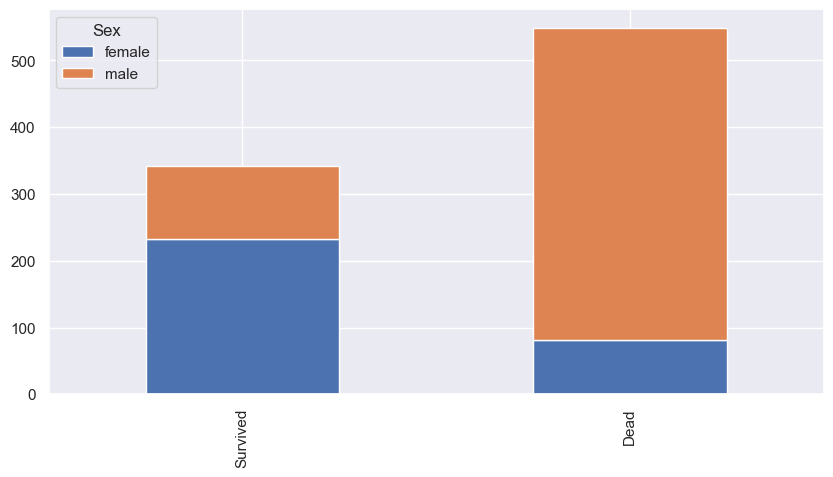

In [33]:
bar_chart('Sex')

데이터를 보면 **남성**이 **여성**보다 생존율이 적은 것을 발견

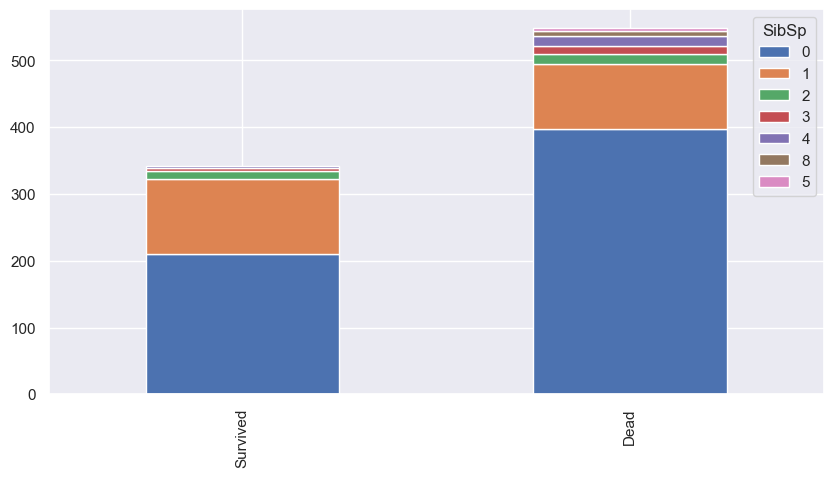

In [34]:
bar_chart('SibSp')

**형제자매 또는 배우자가 2명 이상 탑승한 사람**의 생존 가능성이 더 높다는 것 확인

**형제자매나 배우자 없이 탑승한 사람**이 사망할 가능성이 더 높다는 것 확인

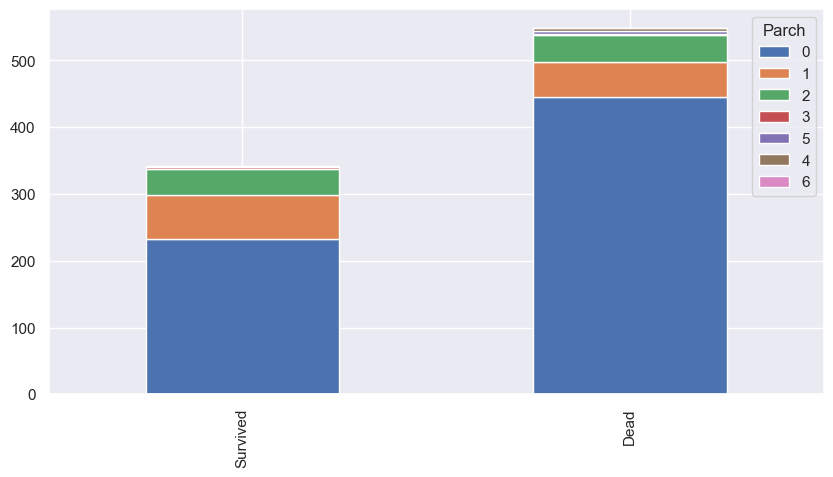

In [35]:
bar_chart('Parch')

**부모 또는 자녀가 2명 이상 탑승한 사람**이 생존 가능성이 더 높다는 것 확인

**혼자 탑승한 사람**이 사망할 가능성이 더 높다는 것 확인

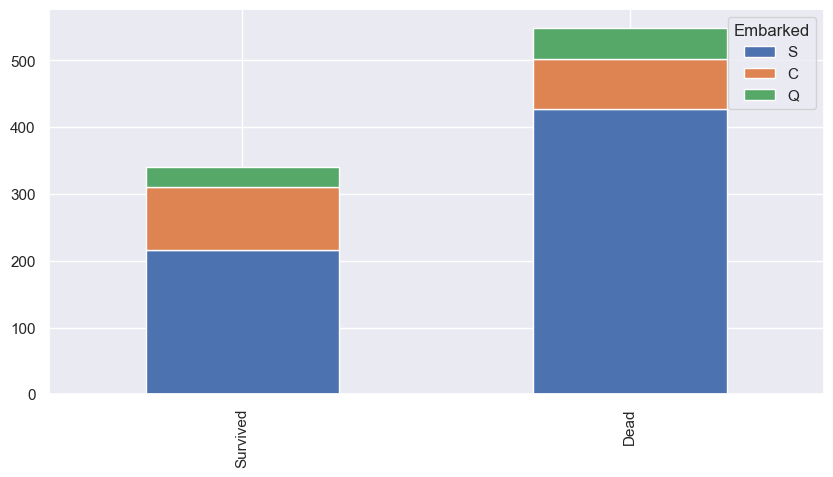

In [36]:
bar_chart('Embarked')

**C에서 탑승한 사람**이 생존 가능성이 약간 더 높다는 것 확인

**Q에 탑승한 사람**이 사망할 가능성이 더 높다는 것 확인

**S에서 탑승한 사람**이 사망할 가능성이 더 높다는 것 확인

<Figure size 1000x600 with 0 Axes>

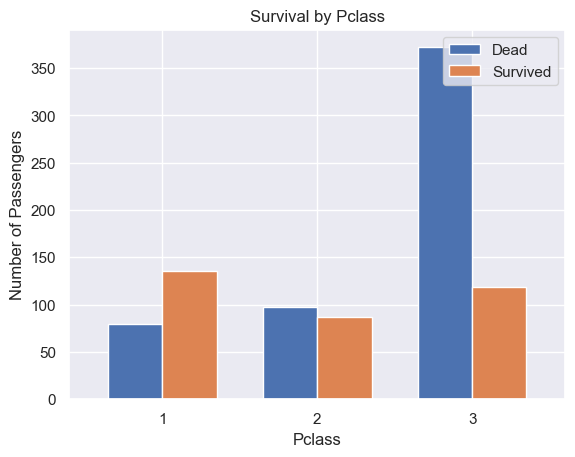

In [37]:
pclass_survival_counts = train.groupby(['Pclass', 'Survived']).size().unstack()

# 차트 설정
plt.figure(figsize=(10, 6))
pclass_survival_counts = pclass_survival_counts.reindex([1, 2, 3])  # Pclass가 1, 2, 3 순서로 표시되도록 설정

# 생존자와 사망자에 따른 바 차트 그리기
pclass_survival_counts.plot(kind='bar', width=0.7)
plt.title("Survival by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)  # x축 라벨 수평 정렬
plt.legend(["Dead", "Survived"], loc="upper right")

# 그래프 보여주기
plt.show()

차트상 생존자 수는 **1st > 2st > 3st**로 나뉨

## 데이터 클리닝

### 이름

In [38]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [39]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [40]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

### Title 매핑
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [41]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

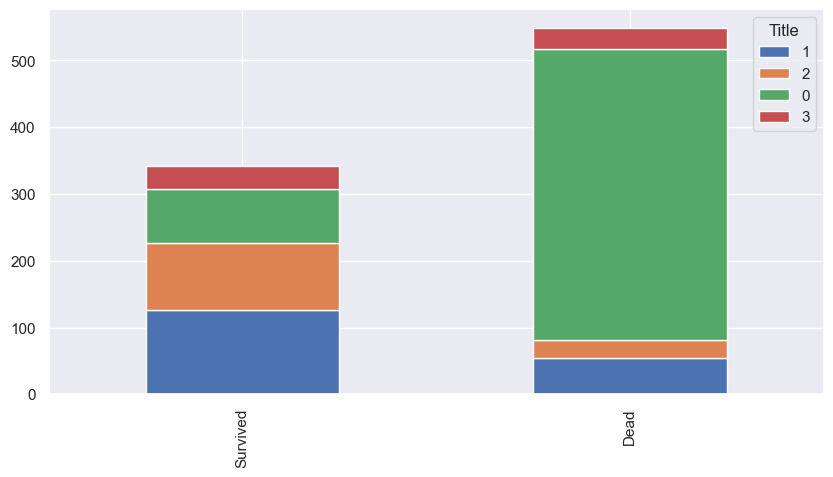

In [42]:
bar_chart('Title')

In [43]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 성별 분류

male:0

female:1

In [46]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

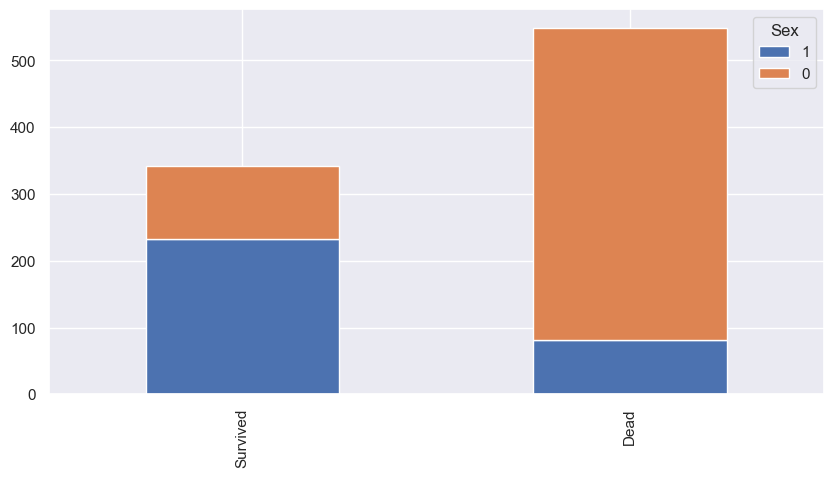

In [47]:
bar_chart('Sex')

### 나이 분류
#### 나이 null 값
- medida()으로 나이 찾기

In [48]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Users\lms\AppData\Local\Temp\ipykernel_29448\2047599257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
C:\Users\lms\AppData\Local\Temp\ipykernel_29448\2047599257.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [49]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


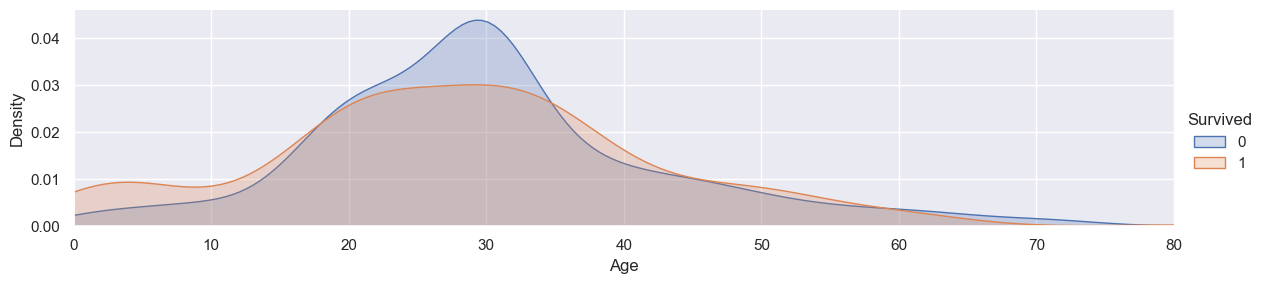

In [50]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [53]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 3
    dataset.loc[dataset['Age'] > 50, 'Age'] = 4


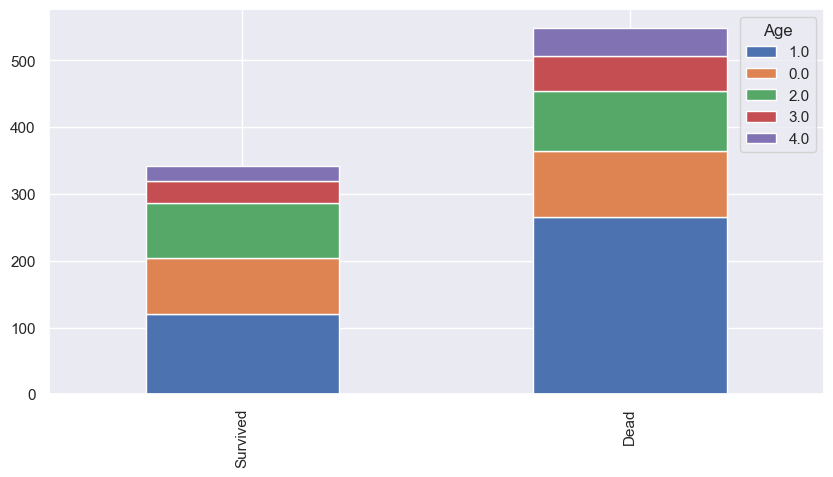

In [54]:
bar_chart('Age')

### 탑승장 분류

#### null값 채우기

<Axes: >

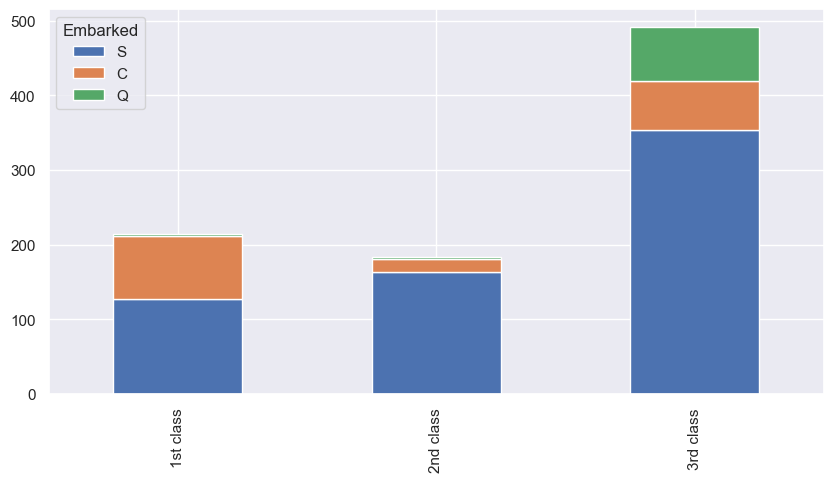

In [55]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [56]:
# 빈값에 S채우기
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [58]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 가격

In [59]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

C:\Users\lms\AppData\Local\Temp\ipykernel_29448\193340708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\lms\AppData\Local\Temp\ipykernel_29448\193340708.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,1.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,1.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


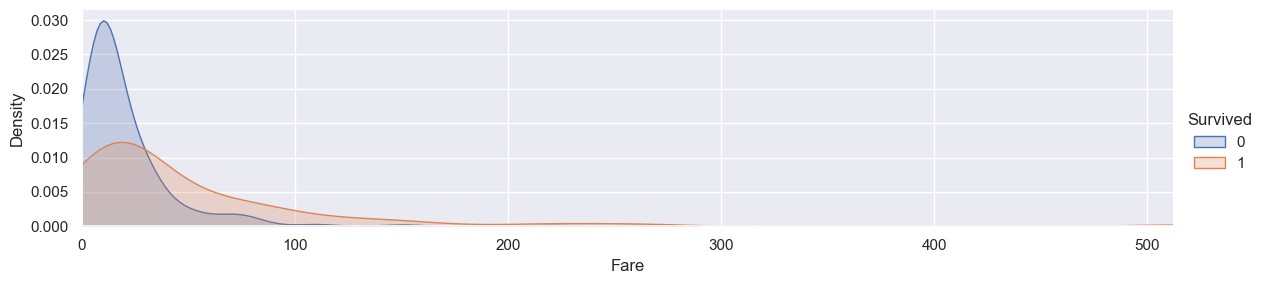

In [60]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

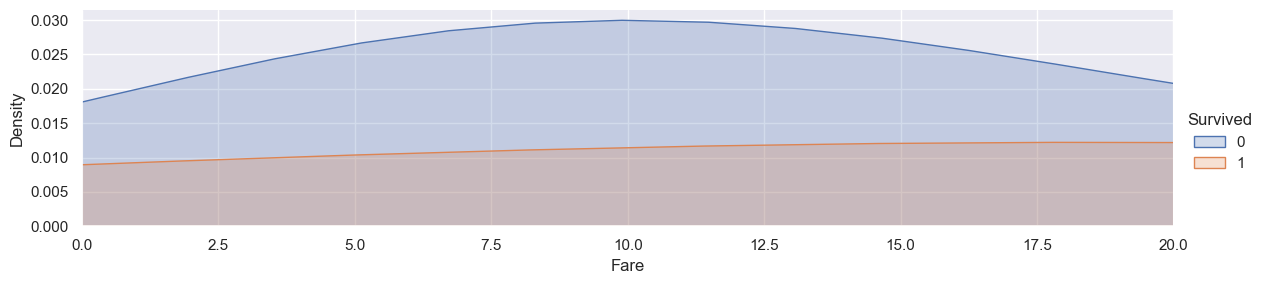

In [61]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 30.0)

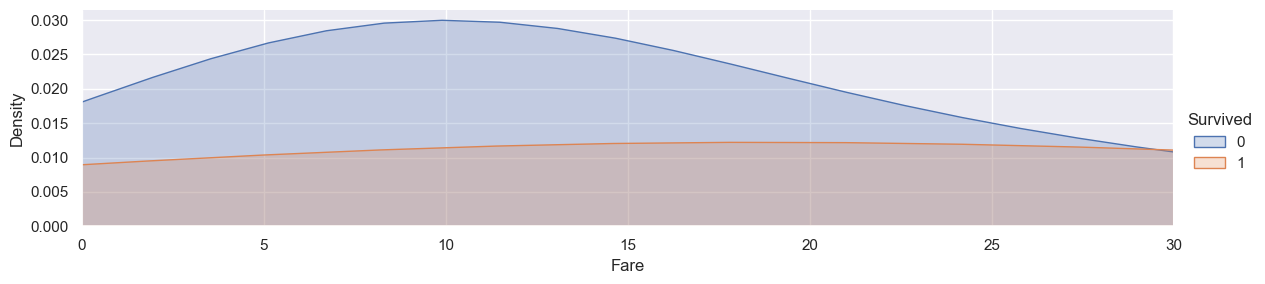

In [62]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 512.3292)

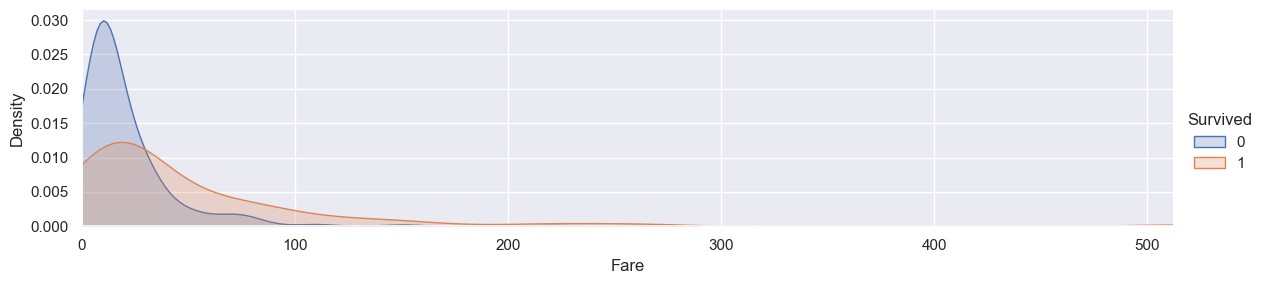

In [63]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [64]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 탑승 호실 분류

In [66]:
train.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [67]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

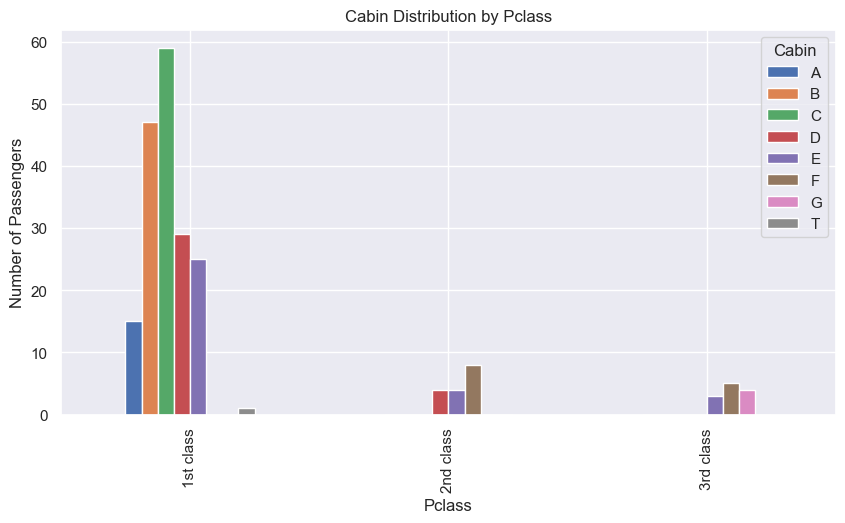

In [68]:
# 각 Pclass별 Cabin 값의 개수 계산
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

# DataFrame으로 결합하고 NaN을 0으로 채움
df = pd.DataFrame({'1st class': Pclass1, '2nd class': Pclass2, '3rd class': Pclass3}).fillna(0).T
df = df.astype(int)  # 정수형으로 변환

# 독립형 바 차트 생성
df.plot(kind='bar', stacked=False, figsize=(10, 5))
plt.title("Cabin Distribution by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number of Passengers")
plt.legend(title="Cabin")

# 그래프 보여주기
plt.show()

In [69]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [70]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

C:\Users\lms\AppData\Local\Temp\ipykernel_29448\2600729139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
C:\Users\lms\AppData\Local\Temp\ipykernel_29448\2600729139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

### 탑승 인원 : family size

In [71]:
train["FamilySize_pc"] = train["Parch"] + 1
test["FamilySize_pc"] = test["Parch"] + 1
train["FamilySize_pc"]

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    3
889    1
890    1
Name: FamilySize_pc, Length: 891, dtype: int64

c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lms\Desktop\Titanic_\.venv\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 7.0)

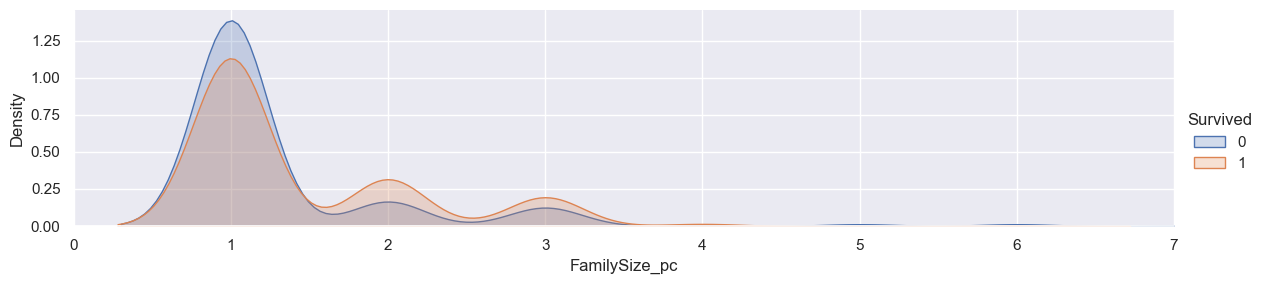

In [72]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize_pc',shade= True)
facet.set(xlim=(0, train['FamilySize_pc'].max()))
facet.add_legend()
plt.xlim(0)

In [73]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize_pc'] = dataset['FamilySize_pc'].map(family_mapping)

In [74]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize_pc
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,0.8,1,2,0.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.0
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize_pc
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,0.8,1,2,0.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.0
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [76]:
# 필요없는 열 삭제
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [77]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize_pc
0,0,3,0,1.0,0.0,2.0,0,0,0.0
1,1,1,1,2.0,2.0,0.8,1,2,0.0
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.0
4,0,3,0,2.0,0.0,2.0,0,0,0.0
5,0,3,0,1.0,0.0,2.0,2,0,0.0
6,0,1,0,4.0,2.0,1.6,0,0,0.0
7,0,3,0,0.0,1.0,2.0,0,3,0.4
8,1,3,1,1.0,0.0,2.0,0,2,0.8
9,1,2,1,0.0,2.0,1.8,1,2,0.0


## 필요 데이터 추출을 위한 조합 비교

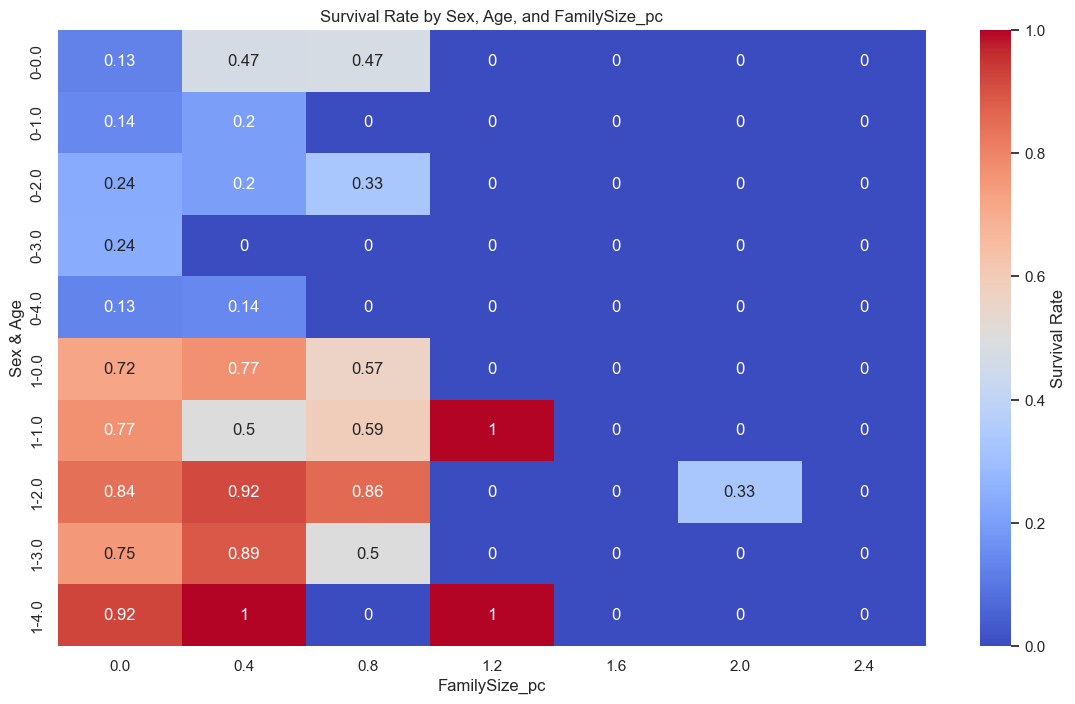

In [78]:
# 1. "Sex", "Age", "FamilySize_pc" 조합 시각화
# "Age", "Sex", "FamilySize_pc" 조합에 따른 생존율 계산
survival_rate_all = train.groupby(['Sex', 'Age', 'FamilySize_pc'])['Survived'].mean().unstack().fillna(0)

# 시각화 - "Sex", "Age", "FamilySize_pc" 조합 생존율
plt.figure(figsize=(14, 8))
sns.heatmap(survival_rate_all, annot=True, cmap='coolwarm', cbar_kws={'label': 'Survival Rate'})
plt.title("Survival Rate by Sex, Age, and FamilySize_pc")
plt.xlabel("FamilySize_pc")
plt.ylabel("Sex & Age")
plt.show()

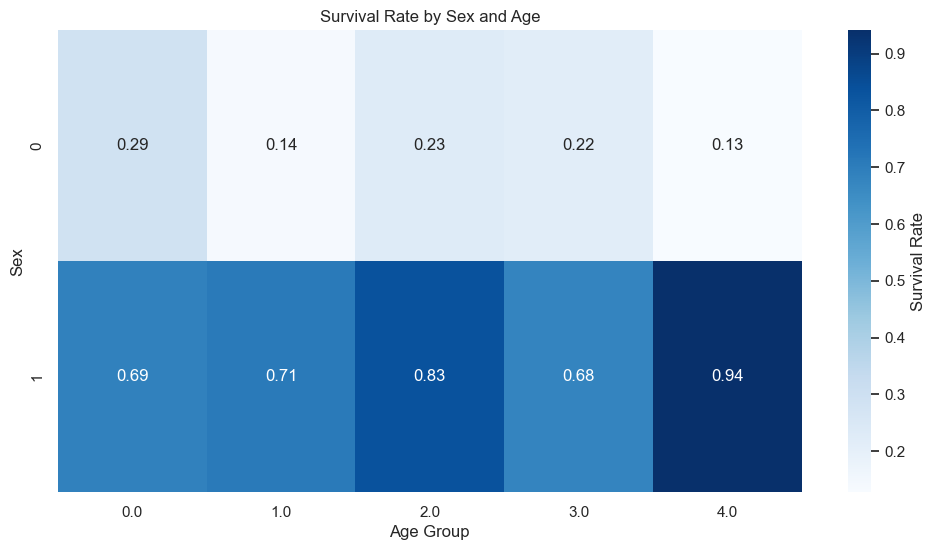

In [79]:
# 2. "Sex"와 "Age" 조합만으로 시각화
# "Age", "Sex" 조합에 따른 생존율 계산
survival_rate_sex_age = train.groupby(['Sex', 'Age'])['Survived'].mean().unstack().fillna(0)

# 시각화 - "Sex"와 "Age" 조합 생존율
plt.figure(figsize=(12, 6))
sns.heatmap(survival_rate_sex_age, annot=True, cmap='Blues', cbar_kws={'label': 'Survival Rate'})
plt.title("Survival Rate by Sex and Age")
plt.xlabel("Age Group")
plt.ylabel("Sex")
plt.show()

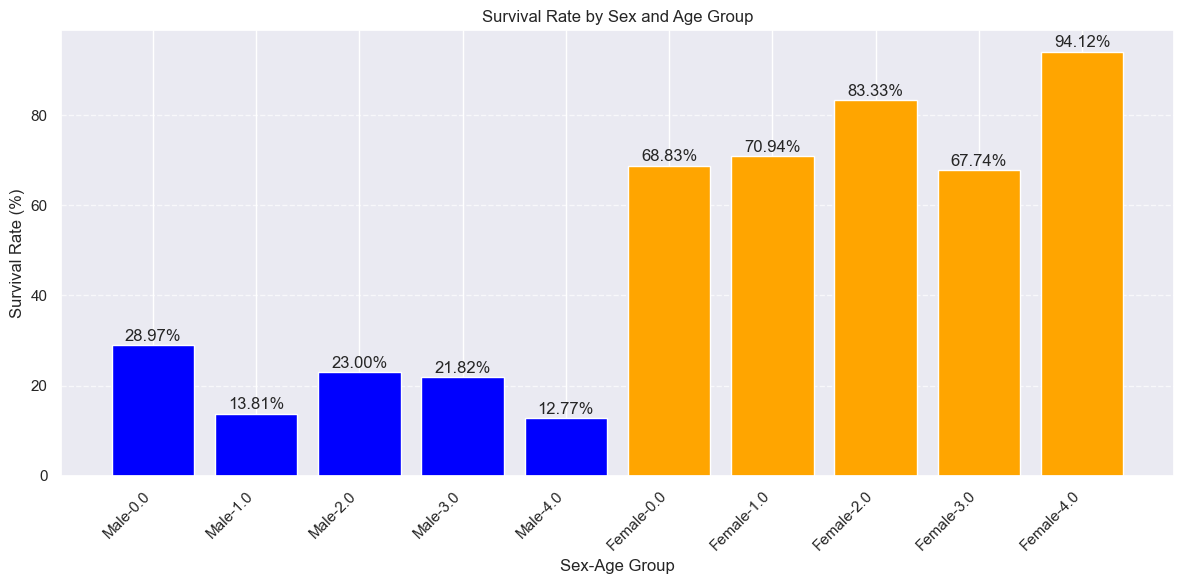

In [82]:
# "Sex"와 "Age" 조합에 따른 생존율 계산
survival_rate_sex_age = train.groupby(['Sex', 'Age'])['Survived'].mean().reset_index()

# 성별에 따라 색상을 다르게 설정
colors = ['blue' if sex == 0 else 'orange' for sex in survival_rate_sex_age['Sex']]

# 시각화 - "Sex"와 "Age" 조합 생존율 (Bar Chart)
plt.figure(figsize=(12, 6))
plt.bar(
    survival_rate_sex_age.index, 
    survival_rate_sex_age['Survived'] * 100, 
    color=colors, 
    tick_label=[f"{'Male' if sex == 0 else 'Female'}-{age}" 
                for sex, age in zip(survival_rate_sex_age['Sex'], survival_rate_sex_age['Age'])]
)

plt.title("Survival Rate by Sex and Age Group")
plt.xlabel("Sex-Age Group")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 생존율 퍼센트 표시
for i, value in enumerate(survival_rate_sex_age['Survived']):
    plt.text(i, value * 100 + 1, f"{value * 100:.2f}%", ha='center')

plt.tight_layout()
plt.show()

## 추측 결과
1. 도출된 결과: 여성의 경우 나이가 많을 수록 생존율이 높아지지만 남성의 경우 나이가 적을 수록 생존율이 높아진다.

2. 생존율 순서: 늙은 여성 > 젊은 여성 > 젊은 남성 > 늙은 남성 순으로 뽑 을 수 있다.

## 모델 학습 및 추론

In [80]:
from sklearn.ensemble import RandomForestClassifier

y = train['Survived']

features = ['Age', 'Sex']
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('result.csv', index=False)
print("Your  was successfully saved!")

Your  was successfully saved!


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


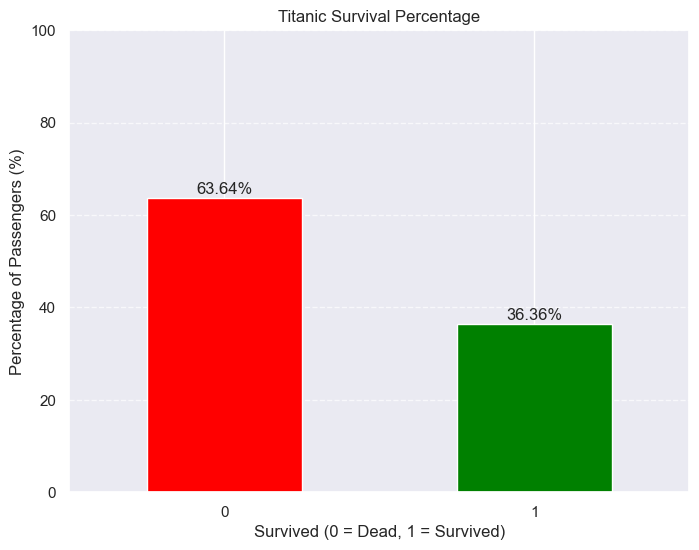

In [81]:
# CSV 파일 로드 (경로는 사용자의 로컬에 맞게 변경)
file_path = 'result.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# Survived 열에서 생존자(1)와 사망자(0) 비율 계산
survival_percentages = data['Survived'].value_counts(normalize=True) * 100

# 시각화
plt.figure(figsize=(8, 6))
survival_percentages.plot(kind='bar', color=['red', 'green'])
plt.title('Titanic Survival Percentage')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Percentage of Passengers (%)')
plt.xticks(rotation=0)  # X축 라벨 수평 정렬
plt.ylim(0, 100)  # Y축 범위를 0%에서 100%로 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대에 퍼센트 값 표시
for i, value in enumerate(survival_percentages):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

plt.show()